In [1]:
pip install livelossplot

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,confusion_matrix
from sklearn import metrics
import seaborn as sb
import itertools

In [3]:
x_test = np.load('/content/drive/MyDrive/ASL_Train_Model/X_test.npy')
x_train = np.load('/content/drive/MyDrive/ASL_Train_Model/X_train.npy')
y_test = np.load('/content/drive/MyDrive/ASL_Train_Model/Y_test.npy')
y_train = np.load('/content/drive/MyDrive/ASL_Train_Model/Y_train.npy')

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(62400, 28, 28, 3)
(62400, 26)
(15600, 28, 28, 3)
(15600, 26)


In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 26, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [11]:
model.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [12]:
checkpoint = ModelCheckpoint("model_weights_1.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

callbacks = [PlotLossesKerasTF(),checkpoint]

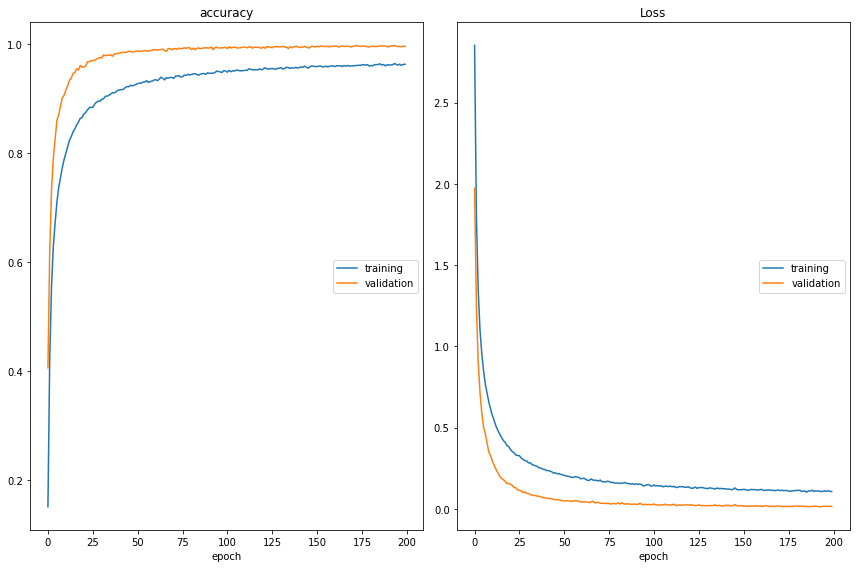

accuracy
	training         	 (min:    0.151, max:    0.964, cur:    0.963)
	validation       	 (min:    0.406, max:    0.998, cur:    0.996)
Loss
	training         	 (min:    0.103, max:    2.851, cur:    0.107)
	validation       	 (min:    0.014, max:    1.973, cur:    0.015)

Epoch 00200: saving model to model_weights_1.h5


In [13]:
history = model.fit(x_train, y_train, batch_size = 512, epochs = 200, verbose = 1, validation_data = (x_test, y_test),callbacks=callbacks)

In [14]:
model.evaluate(x_test,y_test,verbose=0)

[0.015241947956383228, 0.9958974123001099]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


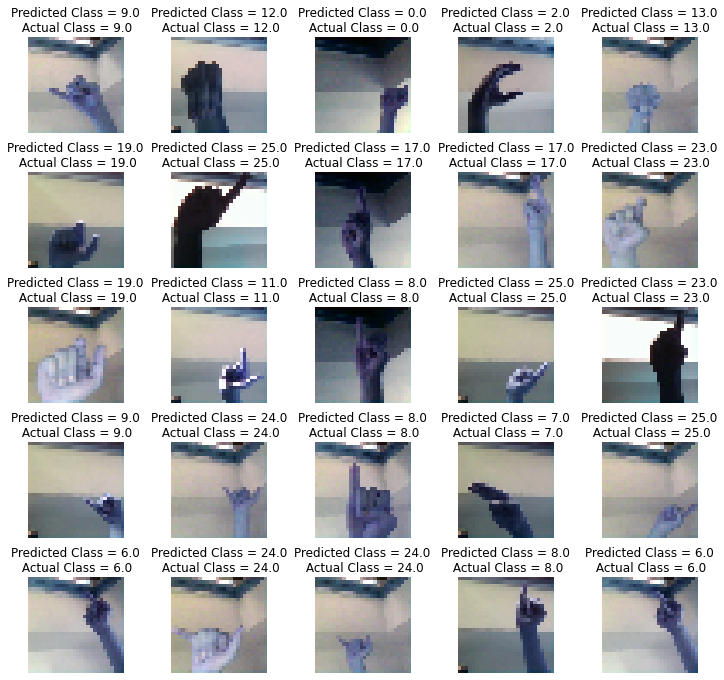

In [15]:
#y_test=np.argmax(y_test, axis=1)
pred = model.predict_classes(x_test)

fig, a = plt.subplots(5, 5, figsize = (12,12))
a = a.ravel()
test_len = len(x_test)
for i in np.arange(0, 25):
    index = np.random.randint(0, test_len)
    a[i].imshow(x_test[index])
    a[i].set_title(f"Predicted Class = {pred[index]:0.1f}\n Actual Class = {y_test[index]:0.1f}")
    a[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [21]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y','Z' ]

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       600
           1       0.99      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      0.99      0.99       600
           4       1.00      0.98      0.99       600
           5       1.00      1.00      1.00       600
           6       1.00      0.99      1.00       600
           7       1.00      1.00      1.00       600
           8       1.00      1.00      1.00       600
           9       1.00      1.00      1.00       600
          10       1.00      1.00      1.00       600
          11       1.00      1.00      1.00       600
          12       1.00      0.99      1.00       600
          13       0.99      0.99      0.99       600
          14       1.00      1.00      1.00       600
          15       1.00      1.00      1.00       600
          16       1.00      1.00      1.00       600
          17       0.99    

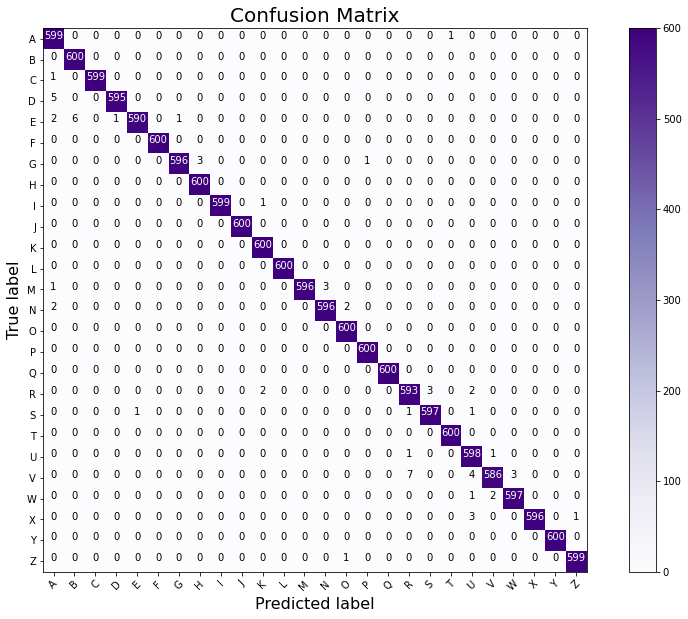

In [31]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (15, 10))
ax = plt.subplot()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
plt.colorbar()
plt.title("Confusion Matrix")
tick = np.arange(len(classes))
plt.xticks(tick, classes, rotation=45)
plt.yticks(tick, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
limit = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
plt.show()

In [20]:
model.save('ASL_Model_Weights.h5')